In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

## New material

From your text:

> [SF OpenData](https://datasf.org/opendata/) is a website where the City and County of San Francisco make some of their data publicly available. One of the data sets contains compensation data for employees of the City. These include medical professionals at City-run hospitals, police officers, fire fighters, transportation workers, elected officials, and all other employees of the City.

We will consider this dataset to be the **population** today for teaching purposes. In general, when using the inference method of today, you will not have the population: only a (random) sample from it.

In [2]:
population = Table.read_table('san_francisco_2019.csv')

In [3]:
population.num_rows

44525

In [4]:
population.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


In [5]:
population.sort('Total Compensation', descending=True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235
Community Health,Public Health,Administrative & Mgmt (Unrep),"Physician Administrator, DPH",434966,0,119213,554179
Public Protection,Sheriff,Correction & Detention,Senior Deputy Sheriff,152153,315896,77275,545324
General Administration & Finance,Retirement Services,Management,Director,397392,0,108913,506305
Community Health,Public Health,Medical & Dental,Supervising Physician Spec,404701,0,99480,504181
Community Health,Public Health,Medical & Dental,Senior Physician Specialist,400992,0,97428,498421


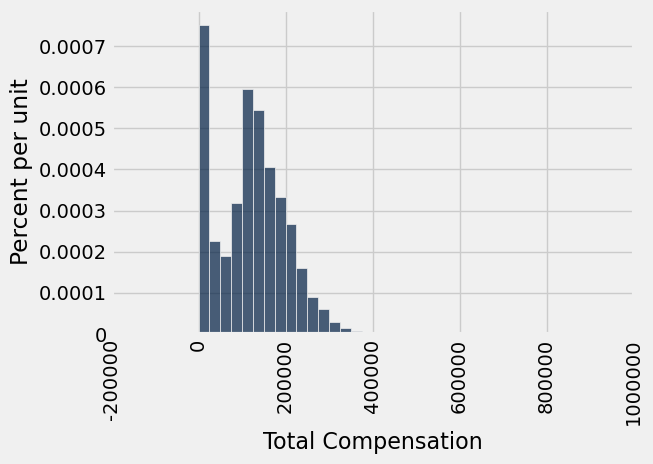

In [6]:
population.hist('Total Compensation', bins = np.arange(0, 800000, 25000))

In [7]:
population.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


#### How can we decide what people to include in today's problem? 

- Maybe we can just think about the minimum salary for full-time workers:
    - $15/hr, 20 hr/wk, 50 weeks

In [8]:
min_salary = 15 * 20 * 50
min_salary

15000

In [9]:
population = population.where('Salary', are.above(min_salary))
population

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


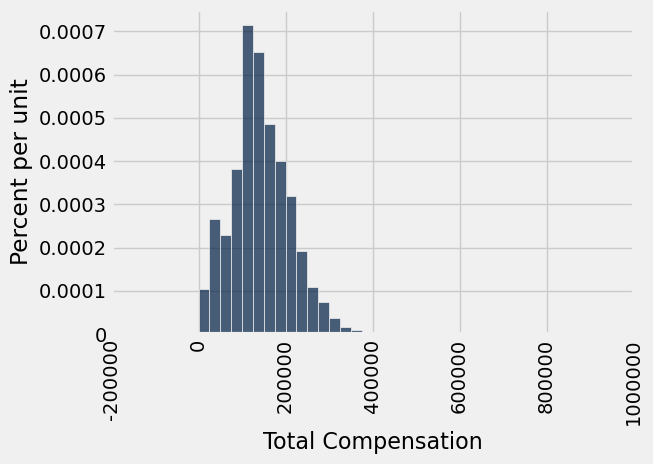

In [10]:
population.hist('Total Compensation', bins = np.arange(0, 800000, 25000))

### Our next problem:

> *Can we find a range of values which we strongly believe that the population parameter lies in?*

- Population parameter for today: The *median* total compensation of all City employees of San Francisco (in 2019).



If you have the entire population, just calculate the parameter. Today, we will use the fact that this dataset is our population as leverage to check whether our method of estimation is doing a good job.

In [11]:
pop_median = percentile(50, population.column('Total Compensation'))
pop_median

135747.0

_____

A sample from the population:

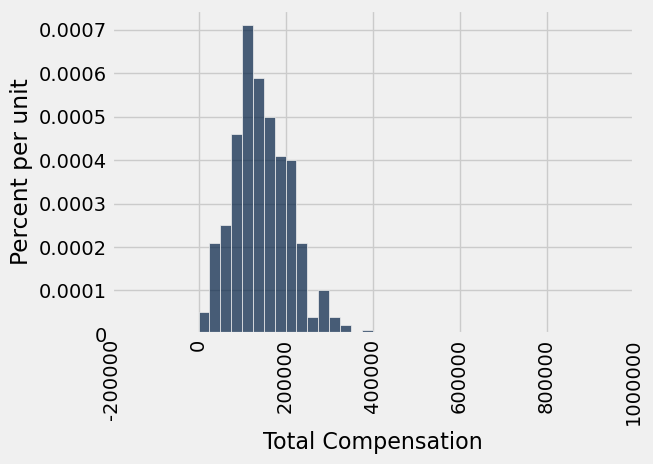

In [12]:
sample_size = 400
a_sample = population.sample(sample_size, with_replacement=False)
a_sample.hist('Total Compensation', bins = np.arange(0, 800000, 25000))

In [13]:
percentile(50, a_sample.column('Total Compensation'))

138096.0

### "Get" new samples with the bootstrap

In [56]:
bootstrap_sample = a_sample.sample(k = a_sample.num_rows, with_replacement = True)

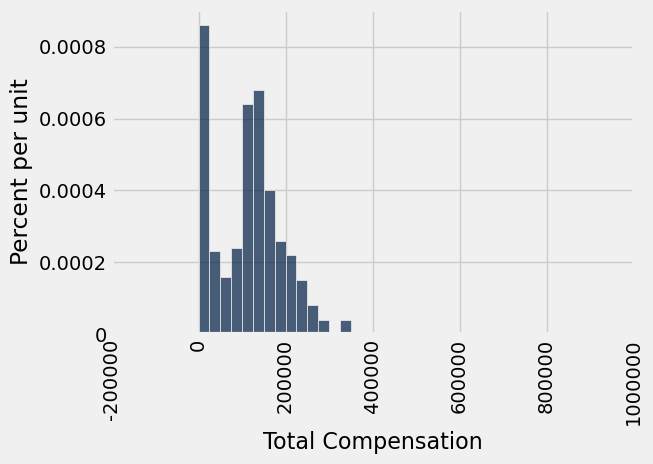

In [57]:
bootstrap_sample.hist('Total Compensation', bins = np.arange(0, 800000, 25000))

In [58]:
percentile(50, bootstrap_sample.column('Total Compensation'))

122834.0

In [59]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = a_sample.sample(k = a_sample.num_rows, with_replacement = True)
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [60]:
bootstrapped_sample_medians = make_array()
num_resamples = 1000

for i in np.arange(num_resamples):
    new_median = one_bootstrap_median()
    bootstrapped_sample_medians = np.append(bootstrapped_sample_medians, new_median)

In [55]:
bootstrapped_sample_medians

array([ 124841.,  120633.,  125481.,  120382.,  123216.,  117755.,
        132224.,  124737.,  116562.,  116031.,  120633.,  123093.,
        121614.,  120721.,  121761.,  120436.,  121749.,  114256.,
        118441.,  122834.,  120721.,  116562.,  121276.,  124841.,
        124737.,  120436.,  120151.,  118516.,  107034.,  121761.,
        118441.,  121276.,  120436.,  120436.,  121749.,  121749.,
        120721.,  124841.,  116031.,  120382.,  121614.,  120151.,
        120151.,  120151.,  114021.,  119558.,  120721.,  121749.,
        121749.,  121749.,  120436.,  125481.,  119558.,  125481.,
        122399.,  118516.,  124085.,  119359.,  123538.,  123538.,
        117755.,  120382.,  126485.,  122834.,  116066.,  117755.,
        115747.,  121749.,  123216.,  124841.,  120633.,  121761.,
        116031.,  121749.,  120721.,  117051.,  118441.,  121614.,
        124767.,  121614.,  120696.,  119558.,  121614.,  120151.,
        122834.,  123216.,  117051.,  120436.,  116007.,  1212

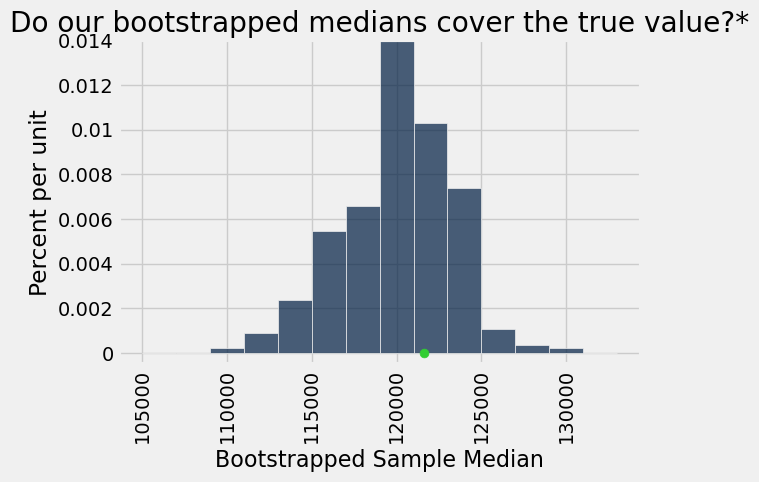

In [80]:
bootstrapped_median_table = Table().with_column('Bootstrapped Sample Median', bootstrapped_sample_medians)
bootstrapped_median_table.hist(bins = np.arange(105000, 135000, 2000))

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Do our bootstrapped medians cover the true value?*');

Remember that in settings where we use this method, we do not have the true value of the parameter. We have it today for teaching purposes. We will not know in reality whether the bootstrapped distribution of statistics covers the parameter (we hope that it does).

### Percentiles help us describe ordered lists

**Discussion Questions** 

- Which expresssions return `True` when `s = array([1, 5, 7, 3, 9])`?

1. `percentile(10, s) == 0`
2. `percentile(39, s) == percentile(40, s)`
3. `percentile(40, s) == percentile(41, s)`
4. `percentile(50, s) == 5`







In [16]:
s = make_array(1,5,7,3,9)

In [17]:
percentile(10, s) == 0

False

In [18]:
percentile(39, s) == percentile(40, s)

True

In [19]:
percentile(40, s) == percentile(41, s)

False

In [20]:
percentile(50, s) == 5

True

### The confidence interval is a tool for estimation

In [73]:
left = percentile(5, bootstrapped_sample_medians)
right = percentile(95, bootstrapped_sample_medians)

make_array(left, right)

array([ 114256.,  124767.])

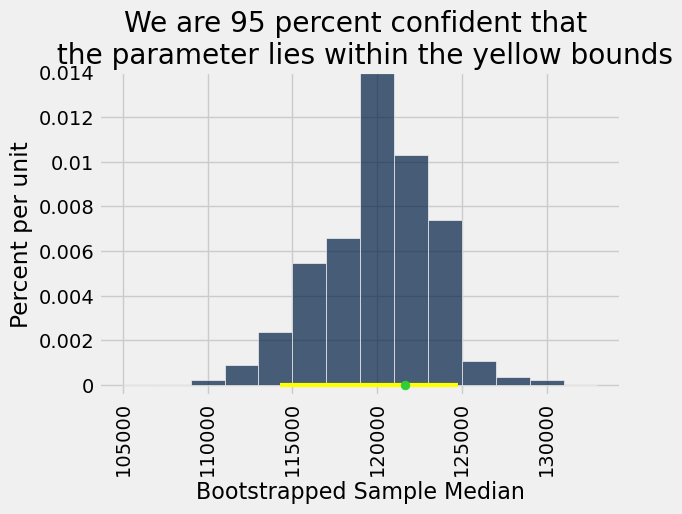

In [79]:
bootstrapped_median_table.hist(bins = np.arange(105000, 135000, 2000))

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);
plots.title('We are 95 percent confident that \n the parameter lies within the yellow bounds');